## Example - Beginner 5x5 program (inspired by [stronglifts](https://stronglifts.com/5x5/))

This notebook shows features of [streprogen](https://github.com/tommyod/streprogen), the Python strength program generator.

- [GitHub repository](https://github.com/tommyod/streprogen)
- [Python Package Index (PyPI)](https://pypi.org/project/streprogen/)
- [Report issues or make feature requests](https://github.com/tommyod/streprogen/issues)

Contributions to the code are welcome. :)

In [1]:
!pip install streprogen matplotlib --quiet --no-cache --upgrade

### Imports

In [2]:
from streprogen import Program, reps_to_intensity, progression_diffeq
import matplotlib.pyplot as plt
import functools

### Choose level of non-linearity

By default, `streprogen` introduces a little non-linearity in the general strength progression, see below.

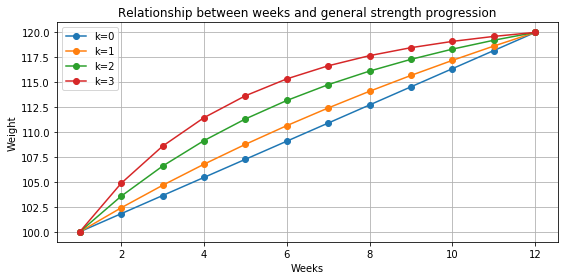

In [3]:
plt.figure(figsize=(8, 4))
plt.title("Relationship between weeks and general strength progression")

duration = 12
weeks = list(range(1, duration + 1))

# For k=1, 2, 3, 4, plot the general strength progression function
for k in range(0, 4):
    progression = functools.partial(progression_diffeq, k=k)
    # The weights are arbitrary here, it's just to show the general behavior
    # These weights will not be used in the actual program. In the actual program,
    # weights for your specific exercises will be used.
    plt.plot(weeks, progression(weeks, start_weight=100, final_weight=120, 
                                start_week=1, final_week=12), '-o', label="k=" + str(k))
    
# Set up the plot and show it
plt.xlabel("Weeks"); plt.ylabel("Weight")
plt.grid(); plt.legend(); plt.tight_layout()

You can choose the non-linearity used below. Setting `k=0` removes all non-linearity.

In [4]:
# Setting k=0 means linear progression.
# The default value is slightly higher than 0.
k = 0
progression = functools.partial(progression_diffeq, k=k)

### Program setup

Below is the code creating the program.

In [5]:
program = Program(
    # The name of the training program
    name='Beginner5x5',
    # The duration of the training program in weeks.
    # Here day A and B are cycled with 3 workouts per week, so the duration would be ~8 weeks
    duration=12,
    # The baseline number of repetitions per dynamic exercise.
    reps_per_exercise=25,
    # The baseline intensity value (approx 82 %)
    intensity=reps_to_intensity(5),
    # Units for the weights, typically 'kg', 'lbs' or '' (empty)
    units='kg',
    # What the weights are rounded to (closest multiple of this number).
    round_to=2.5,
    # Override the default progression function with out own
    progression_func=progression
    
)

# Increase in percentage per week. If set to 1.5, it takes you from 100kg to 103kg in 2 weeks.
# Here day A and B are cycled with 3 workouts per week, so we set it to a reasonably low value.
percent_inc_per_week = 1.4

# --------------------------------------------------
# ---- INPUT YOUR OWN 1RMs AS START WEIGHTS BELOW --
# ---- Carefully assess the program, then go back --
# ---- and adjust further if necessary.           --
# --------------------------------------------------

with program.Day("A"):
    program.DynamicExercise(name="Squat", start_weight=80, min_reps=5, max_reps=5, 
                            percent_inc_per_week=percent_inc_per_week)
    
    program.DynamicExercise(name="Bench Press", start_weight=60, min_reps=5, max_reps=5, 
                            percent_inc_per_week=percent_inc_per_week)
    
    program.DynamicExercise(name="Barbell Row", start_weight=50, min_reps=5, max_reps=5, 
                            percent_inc_per_week=percent_inc_per_week)
    
with program.Day("B"):
    program.DynamicExercise(name="Squat", start_weight=80, min_reps=5, max_reps=5, 
                            percent_inc_per_week=percent_inc_per_week)
    
    program.DynamicExercise(name="Overhead Press", start_weight=40, min_reps=5, max_reps=5, 
                            percent_inc_per_week=percent_inc_per_week)
    
    # Notice the additional `reps=5` here, constraining this exercise to a single set.
    # This overrides the `reps_per_exercise=25` parameter in the program for this exercise.
    program.DynamicExercise(name="Deadlift", start_weight=80, min_reps=5, max_reps=5,
                            percent_inc_per_week=percent_inc_per_week, reps=5)

### Render the program

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Do the computations and render a program. Might take a few seconds.
program.render()

### Print and save the program

In [7]:
print(program)

----------------------------------------------------------------
Program: Beginner5x5

Program parameters
  duration: 12
  reps_per_exercise: 25
  intensity: 82.3
  units: kg
----------------------------------------------------------------
Exercise information
  A
   Squat             80kg -> 93.4kg 
    reps: [5, 5]   weekly inc.: 1.4%
   Bench Press       60kg -> 70.1kg 
    reps: [5, 5]   weekly inc.: 1.4%
   Barbell Row       50kg -> 58.4kg 
    reps: [5, 5]   weekly inc.: 1.4%
  B
   Squat             80kg -> 93.4kg 
    reps: [5, 5]   weekly inc.: 1.4%
   Overhead Press    40kg -> 46.7kg 
    reps: [5, 5]   weekly inc.: 1.4%
   Deadlift          80kg -> 93.4kg 
    reps: [5, 5]   weekly inc.: 1.4%
----------------------------------------------------------------
Program
 Week 1
  A
   Squat            5 x 65kg    5 x 65kg    5 x 65kg    5 x 65kg    5 x 65kg    
   Bench Press      5 x 50kg    5 x 50kg    5 x 50kg    5 x 50kg    5 x 50kg    
   Barbell Row      5 x 40kg    5 x 40kg

### Export the program as `.html` or `.tex`, then to `.pdf`

A `.html` file can be printed directly from your browser, or printed to a `.pdf` from your browser.

In [8]:
# Save the program as a HTML file
with open('Beginner5x5.html', 'w', encoding='utf-8') as file:
    # Control table width (number of sets) by passing the 'table_width' argument
    file.write(program.to_html(table_width=8))

In [9]:
# Save the program as a TEX file
with open('Beginner5x5.tex', 'w', encoding='utf-8') as file:
    file.write(program.to_tex(table_width=8))

Use a `.tex` to generate `.pdf` if you have LaTeX installed, or use:
    
- [latexbase.com](https://latexbase.com/) from your browser.

In [10]:
# If you have LaTeX installed on your system, you can render a program to .tex
# Alternatively, you can paste the LaTeX into: https://latexbase.com/
print(program.to_tex(table_width=8))

% -----------------------------------------------
% Package imports
% -----------------------------------------------
\documentclass[12pt, a4paper]{article}% 'twoside' for printing
\usepackage[utf8]{inputenc}% Allow input to be UTF-8
\usepackage[margin = 2cm]{geometry}% May be used to set margins

% -----------------------------------------------
% Document start
% -----------------------------------------------

\begin{document}
\large

\section*{Program: Beginner5x5}

This program was made using \verb|streprogen|,
the Python strength program generator.
The latest version can be found at \\
\verb|https://pypi.python.org/pypi/streprogen/|.


\section*{Program parameters}
\begin{tabular}{l|l}
	\textbf{Parameter} & \textbf{Value} \\ \hline
	\verb|duration|             & 12 \\
	\verb|reps_per_exercise|    & 25 \\
	\verb|intensity|            & 82.3 \\
	\verb|units|                & kg
\end{tabular}


\section*{Exercise information}
\begin{tabular}{llllll}
    \textbf{Exercise} & \textbf{S